Monte Carlo Simulation

Monte Carlo Simulation is a way of studying probability distributions with sampling. The basic idea is that if you draw many samples from a distribution and then make a histogram, the histogram will be shaped a lot like the original distribution. In code, I can either plot a probability distribution:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([  3.,   6.,  12.,  14.,  19.,  14.,  16.,   8.,   6.,   2.]),
 array([-2.33324928, -1.85653778, -1.37982628, -0.90311478, -0.42640328,
         0.05030823,  0.52701973,  1.00373123,  1.48044273,  1.95715424,
         2.43386574]),
 <a list of 10 Patch objects>)

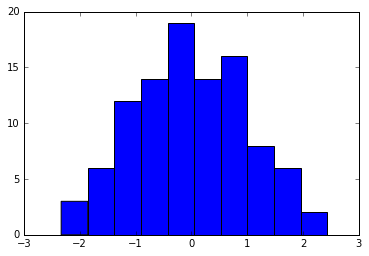

In [8]:
x = sorted(np.random.normal(0,1,100))
plt.hist(x)

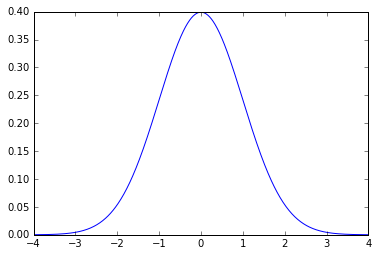

In [18]:
from scipy.stats import norm
x = np.arange(-4,4,0.01)
plt.plot(x, norm.pdf(x))

In [19]:
# Modeling Policy Choices
num_adults = 227e6
basic_income = 7.25*40*50
labor_force = 154e6
disabled_adults = 21e6
wealth_transfers = 3369e9

In [37]:
from scipy.stats import *
# Basic Income Cost and Benefits
direct_cost = num_adults*basic_income
# model admin cost per person with normal, mean of 250, sd of 75
administrative_cost_per_person = norm(250,75)
# incentive or disincentive for productive work
non_worker_multiplier = uniform(-0.05, 0.15)
# marginal worker hourly productivity
marginal_worker_hourly_productivity = norm(10,1)
# cost benefit of the labor disincentive:
# .rvs() draws sample from probability, can replicate with numpy...
-1 * (num_adults-labor_force-disabled_adults) * non_worker_multiplier.rvs()* (40*52*marginal_worker_hourly_productivity.rvs())

-40664384663.7384

In [38]:
def jk_rowling(num_non_workers):
    num_of_jk_rowlings = binom(num_non_workers, 1e-7).rvs()
    return num_of_jk_rowlings * 1e9

In [50]:
def basic_income_cost_benefit():
    direct_costs = num_adults * basic_income
    administrative_costs = num_adults * administrative_cost_per_person.rvs()
    labor_effect_costs_benefit = -1 * ((num_adults-labor_force-disabled_adults) *
                                        non_worker_multiplier.rvs() *
                                        (40*52*marginal_worker_hourly_productivity.rvs())
                                        )
    return (direct_costs +
           administrative_costs +
           labor_effect_costs_benefit +
           jk_rowling(num_adults-labor_force-disabled_adults))

In [51]:
basic_income_cost_benefit()

3347443790581.677

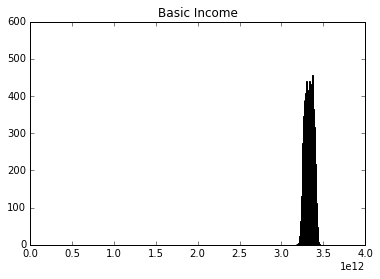

In [55]:
from numpy import zeros

N = 1024*12
bi = zeros(shape=(N,), dtype=float)

for k in range(N):
    bi[k] = basic_income_cost_benefit()

width = 4e12
height=50*N/1024

plt.title("Basic Income")
plt.hist(bi, bins=50)
plt.axis([0,width,0,height])
plt.show()

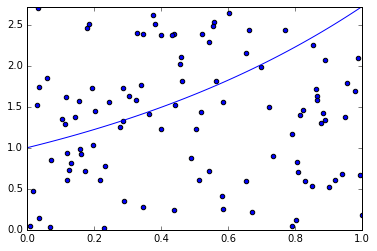

In [56]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([0,1])
plt.ylim([0, np.e]);

In [57]:
pts

array([[ 0.85022815,  0.53242175],
       [ 0.88304157,  1.41935304],
       [ 0.01689206,  0.47795473],
       [ 0.58299102,  0.4159322 ],
       [ 0.58604875,  1.5584085 ],
       [ 0.22941415,  0.02419061],
       [ 0.4904641 ,  0.87612787],
       [ 0.06951185,  0.03030852],
       [ 0.44139487,  1.51656563],
       [ 0.03315512,  2.6976455 ],
       [ 0.07048764,  0.85382484],
       [ 0.86492822,  1.62841396],
       [ 0.11800268,  0.60391176],
       [ 0.00806282,  0.04342025],
       [ 0.81591727,  1.40006429],
       [ 0.3290877 ,  2.39623381],
       [ 0.98693057,  2.08745135],
       [ 0.54401516,  2.29300959],
       [ 0.02996142,  1.51946422],
       [ 0.86206824,  1.71139364],
       [ 0.17718148,  2.46068503],
       [ 0.14222741,  1.37369622],
       [ 0.67287505,  0.21161064],
       [ 0.86573157,  1.58199446],
       [ 0.3036227 ,  1.62704709],
       [ 0.65435953,  2.15569793],
       [ 0.97891523,  1.6864375 ],
       [ 0.37516444,  2.6147896 ],
       [ 0.90240555,

In [65]:
from random import random
from math import sqrt, pow



DARTS=100
hits = 0
throws = 0
for i in range (1, DARTS):
    throws += 1
    x = random()
    y = random()
    dist = sqrt(pow(x, 2) + pow(y, 2))
    if dist <= 1.0:
        hits = hits + 1.0

# hits / throws = 1/4 Pi
pi = 4 * (hits / throws)


print "pi = %s" %(pi)

0.100737264012
1.1065527116
0.489848019325
0.71406051191
0.951572261634
0.953903037799
0.746581098271
0.297470422968
0.594294199774
0.518083595349
0.587471606547
0.837376675249
0.900684157604
1.01061769083
0.566576632946
0.898757589795
1.26488843021
0.987158137439
0.414047508756
0.292972936661
0.357503706606
0.769370200202
1.05914839075
0.666034916454
0.456580306063
1.09381527091
0.86963873711
1.03989289916
0.552426242675
0.783382185174
0.784944950276
1.24037656217
0.80062319111
0.72433298836
0.707648498317
0.628090659217
0.904585758545
0.640703689048
0.305509028604
0.294545235927
0.785920522439
0.725918253839
0.822202845067
0.906797973077
0.556198780361
0.961491082417
0.700083563135
0.679160151607
1.24164106944
0.771951733348
0.562420768281
0.383463813719
0.787890632748
0.352850993401
0.915740355253
0.623160159317
0.902270630526
0.896096173218
1.02364019329
0.339266801022
0.310288926535
0.729411765639
1.21943537023
0.349045766806
0.767131728506
1.29839546464
0.776831055809
0.475575292

In [66]:
hits

82.0

In [67]:
throws

99